<a href="https://colab.research.google.com/github/DevanshParmar/Data-Science-Summer-Camp-2021/blob/main/Convolutional%20Neural%20Network%20on%20Fashion-MNIST%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Network on Fashion MNIST Dataset**
This is a CNN Sequential Model implementation on the Fashion MNIST dataset. The code blocks which I played with and weren't effective have been deleted, and also the error-detection code sections, such as print(), type() etc. Hence the code has shortened to effectively about 100 lines.

#### **Uploads**
Setting up libraries and importing dataset files. Here we've imported the libraries, model, layers, optimizer and the dataset.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split, KFold
from skimage import io

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import fashion_mnist

#### **Modeling**
In the next blocks, we train our neural network.
1. The first block defines the batch size, the number of epochs over which the model would be trained, the number of K-Fold splits and the learning rate.
2. The second block defines the sequential CNN model, with various convolutional, normalizing and pooling layers, along with flattening, densing and dropout layers.
3. The next block performs K-Fold Cross Validation.
4. The last block compiles, runs, and trains the neural network.


In [ ]:
im_rows = 28
im_cols = 28
n_batch_size = 500
n_epochs = 5
im_shape = (im_rows, im_cols, 1)

splits = 20
lrate = 0.001

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=128, kernel_size=3, input_shape=im_shape, activation='relu'),
    BatchNormalization(),

    Conv2D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=4),
    Dropout(0.2),

    Conv2D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')
])

In [ ]:
(X, Y), (X_validate, Y_validate) = fashion_mnist.load_data()
assert X.shape == (60000, 28, 28)
assert Y.shape == (60000,)
X = np.asarray(X)

kf = KFold(n_splits = splits, shuffle=True, random_state=None)
kf.get_n_splits(X)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
cnn_model.compile(
    optimizer=Adam(learning_rate=lrate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

i = 0
for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    Y_train = Y_train.reshape(Y_train.shape[0], 1)
    Y_test = Y_test.reshape(Y_test.shape[0], 1)

    i += 1
    cnnm = cnn_model.fit(X_train, Y_train, epochs=n_epochs, validation_data=(X_test, Y_test))
    print(" ")
    if i == 1:
        print("The model has run through 1/" + str(splits) + " iteration of the K-fold validation method.")
        print(" ")
    elif i != splits:
        print("The model has run through " + str(i) +"/" + str(splits) + " iterations of the K-fold validation method.")
        print(" ")
print("The model has run through all iterations of the K-fold validation method.")

Epoch 1/5
1782/1782 [==============================] - 18s 9ms/step - loss: 0.6877 - accuracy: 0.7620 - val_loss: 0.3079 - val_accuracy: 0.8810
Epoch 2/5
1782/1782 [==============================] - 15s 8ms/step - loss: 0.3512 - accuracy: 0.8734 - val_loss: 0.2713 - val_accuracy: 0.9030
Epoch 3/5
1782/1782 [==============================] - 14s 8ms/step - loss: 0.3085 - accuracy: 0.8891 - val_loss: 0.2435 - val_accuracy: 0.9117
Epoch 4/5
1782/1782 [==============================] - 14s 8ms/step - loss: 0.2783 - accuracy: 0.8989 - val_loss: 0.3117 - val_accuracy: 0.8780
Epoch 5/5
1782/1782 [==============================] - 14s 8ms/step - loss: 0.2490 - accuracy: 0.9092 - val_loss: 0.2227 - val_accuracy: 0.9167
 
The model has run through 1/20 iteration of the K-fold validation method.
 
Epoch 1/5
1782/1782 [==============================] - 15s 8ms/step - loss: 0.2326 - accuracy: 0.9155 - val_loss: 0.2252 - val_accuracy: 0.9137
Epoch 2/5
1782/1782 [==============================] - 14s

#### **Predictions and Accuracy**
In the next block, we have the loss and accuracy over the training and validation datasets.

In [ ]:
loss_train = cnnm.history['loss']
loss_valid = cnnm.history['val_loss']
accu_train = [100*i for i in cnnm.history['accuracy']]
accu_valid = [100*i for i in cnnm.history['val_accuracy']]

epochs = range(1, 1+n_epochs)

print('              Training Loss is {:.4f}'.format(loss_train[-1]))
print('            Validation Loss is {:.4f}'.format(loss_valid[-1]))
print(' ')
print('          Training Accuracy is {:.2f}%'.format(accu_train[-1]))
print('        Validation Accuracy is {:.2f}%'.format(accu_valid[-1]))
print(' ')
print('  Maximum Training Accuracy is {:.2f}%'.format(max(accu_train)))
print('Maximum Validation Accuracy is {:.2f}%'.format(max(accu_valid)))

              Training Loss is 0.0213
            Validation Loss is 0.0023
 
          Training Accuracy is 99.28%
        Validation Accuracy is 99.93%
 
  Maximum Training Accuracy is 99.28%
Maximum Validation Accuracy is 100.00%


#### **Plots**
Two plots are plotted as following:
1. Training and Validation loss, shown w.r.t. epochs.
2. Training and Validation accuracy, shown w.r.t. epochs.

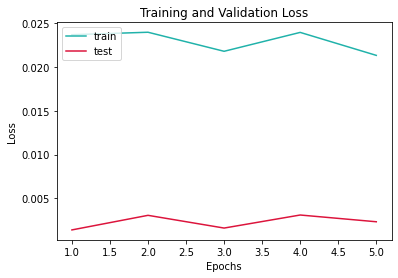

In [ ]:
plt.plot(epochs, loss_train, color='lightseagreen', label='Training Loss')
plt.plot(epochs, loss_valid, color='crimson', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

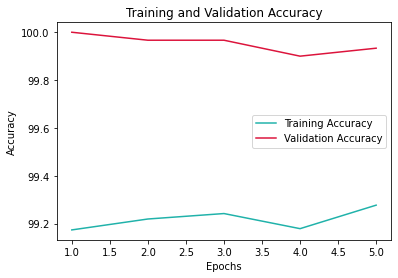

In [ ]:
plt.plot(epochs, accu_train, color='lightseagreen', label='Training Accuracy')
plt.plot(epochs, accu_valid, color='crimson', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Our model has a training set accuracy of around 99.3% and validation set accuracy of around 99.9%.

#### **References and Acknowledgements**
1. Deeplizard YouTube channel's playlist on Neural Networks was a great help: www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU\n
2. Mark Jay's YouTube videos also assisted: www.youtube.com/playlist?list=PLX-LrBk6h3wR27xylD3Rsx4bbA15jlcYC
3. For getting a hang of layers, I studied from this model: https://colab.research.google.com/github/timlovescoding/FASHION-MNIST/blob/master/Tim_Fashion_MNIST.ipynb
4. For plotting the output, I studied from this site: www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib
5. My friends helped me greatly during this assignment. Sincere thanks to Yatish Goel, Atharv Singh Patlan, Shiven Tripathi, Ananya Gupta and Rishabh Dugaye among others.